### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### stratis_price

#### 1. Read the Data

In [2]:
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/stratis_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,5.79,6.23,5.11,6.03,"8,514,110","570,643,000"
1,2017-09-04,6.61,6.74,5.35,5.77,"14,669,700","651,334,000"
2,2017-09-03,6.36,6.59,5.99,6.59,"8,487,740","626,826,000"
3,2017-09-02,7.27,7.27,6.18,6.34,"11,500,400","716,038,000"
4,2017-09-01,7.28,7.78,6.97,7.25,"22,610,800","717,199,000"


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [4]:
df.count()

Date          390
Open          390
High          390
Low           390
Close         390
Volume        390
Market Cap    390
dtype: int64

as we can see we have in this file 7 columns and each column has 390 cells

In [5]:
df.describe()

,Open,High,Low,Close
count,390.000000,390.000000,390.000000,390.000000
mean,1.823314,1.990140,1.671701,1.837540
std,2.830232,3.082738,2.596490,2.837244
min,0.011171,0.013897,0.008483,0.011175
25%,0.055957,0.060666,0.052541,0.056644
50%,0.090728,0.097877,0.085325,0.091032
75%,3.060000,3.522500,2.667500,3.100000
max,10.560000,11.680000,10.030000,10.620000


In [6]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 7 columns):
Date          390 non-null datetime64[ns]
Open          390 non-null float64
High          390 non-null float64
Low           390 non-null float64
Close         390 non-null float64
Volume        390 non-null object
Market Cap    390 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 21.5+ KB


In [7]:
#check if the dataset is duplicated
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
385    False
386    False
387    False
388    False
389    False
Length: 390, dtype: bool

as we can see the data fram has 7 columns. each column has 390 cells, and there is no missing data,but we hve to convert the dt type of the variables "Volume" and "Market Cap" to number


In [8]:
# Count missing data in each column
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

we can see there is no missing data 

### cleaning Data


In [9]:
print('Volume Data Type :', type(df.Volume[0]))
print('Market Cap Data Type :', type(df['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [12]:
# If Volume is equal to '-' convert it to 0
df.loc[df['Market Cap']=="-",'Market Cap']=0

In [13]:
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_number)
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',','')))

df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,390.000000,390.000000,390.000000,390.000000,3.900000e+02,3.900000e+02
mean,1.823314,1.990140,1.671701,1.837540,4.782751e+06,1.794904e+08
std,2.830232,3.082738,2.596490,2.837244,9.211456e+06,2.786563e+08
min,0.011171,0.013897,0.008483,0.011175,6.461000e+03,0.000000e+00
25%,0.055957,0.060666,0.052541,0.056644,4.569400e+04,5.492438e+06
50%,0.090728,0.097877,0.085325,0.091032,1.889225e+05,8.916745e+06
75%,3.060000,3.522500,2.667500,3.100000,5.725200e+06,3.013212e+08
max,10.560000,11.680000,10.030000,10.620000,7.668770e+07,1.039320e+09


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 7 columns):
Date          390 non-null datetime64[ns]
Open          390 non-null float64
High          390 non-null float64
Low           390 non-null float64
Close         390 non-null float64
Volume        390 non-null int64
Market Cap    390 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 21.5 KB


In [15]:
# If Volume is equal to '-' convert it to 0
df.loc[df['Volume']=="-",'Volume']=0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 7 columns):
Date          390 non-null datetime64[ns]
Open          390 non-null float64
High          390 non-null float64
Low           390 non-null float64
Close         390 non-null float64
Volume        390 non-null int64
Market Cap    390 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 21.5 KB


In [17]:
# correlation between columns
correlation = df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.994226,0.996365,0.990888,0.793796,1.000000
High,0.994226,1.000000,0.994201,0.996697,0.837028,0.994210
Low,0.996365,0.994201,1.000000,0.994827,0.796973,0.996369
Close,0.990888,0.996697,0.994827,1.000000,0.819142,0.990876
Volume,0.793796,0.837028,0.796973,0.819142,1.000000,0.793760
Market Cap,1.000000,0.994210,0.996369,0.990876,0.793760,1.000000


let's plot data between Market Cap and other variable, then see the relation between the data


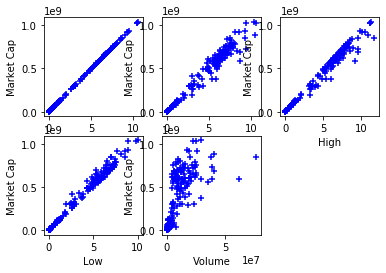

In [18]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(df.Open, df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(df.Close, df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(df.High, df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(df.Low, df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(df.Volume, df['Market Cap'],'Volume')

In [19]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = df[['Open']]
Market_Cap  = df['Market Cap']

In [20]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Model Score
model.score(Open, Market_Cap)

0.9999992895716782

#### 4. Data Visualization

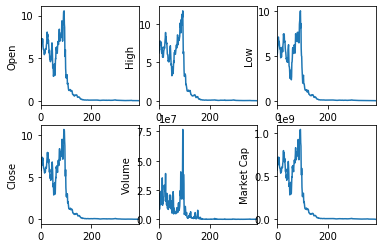

In [22]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df['Market Cap'].plot()